In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


In [10]:
# Load the dataset
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 10 rows:")
df.head(10)

Dataset Shape: (7560, 6)

First 10 rows:


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
5,1-Oct-2020,Afternoon,WA,Men,10,25000
6,1-Oct-2020,Afternoon,WA,Women,3,7500
7,1-Oct-2020,Afternoon,WA,Seniors,11,27500
8,1-Oct-2020,Evening,WA,Kids,15,37500
9,1-Oct-2020,Evening,WA,Men,15,37500


### 1.2 Data Quality Check - Missing and Incorrect Values

In [11]:
#1.	Data wrangling 
# a.Ensure that the data is clean and free from any missing or incorrect entries.
# Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().

print("Missing Values Analysis:")
print("="*80)
missing_values = df.isna().sum()
missing_percentage = (df.isna().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

print(missing_df)
print("\n" + "="*80)

# Check for non-null values using notna()
print("\nNon-Null Values Count:")
print(df.notna().sum())

Missing Values Analysis:
  Column  Missing Count  Missing Percentage
0   Date              0                 0.0
1   Time              0                 0.0
2  State              0                 0.0
3  Group              0                 0.0
4   Unit              0                 0.0
5  Sales              0                 0.0


Non-Null Values Count:
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


In [12]:
# Check for duplicate rows
print("Duplicate Rows Analysis:")
print("="*80)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))

Duplicate Rows Analysis:
Number of duplicate rows: 0


In [13]:
# Clean the data based on findings
df_clean = df.copy()

# Strip whitespaces from string columns
string_columns = ['Date', 'Time', 'State', 'Group']
for col in string_columns:
    df_clean[col] = df_clean[col].str.strip()

# Remove duplicates if any
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
print(f"Removed {initial_rows - len(df_clean)} duplicate rows")


Removed 0 duplicate rows


### 1.4 Data Transformation and Feature Engineering

In [16]:
# Convert Date column to datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%d-%b-%Y')

# Extract additional time features
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Month_Name'] = df_clean['Date'].dt.strftime('%B')
df_clean['Week'] = df_clean['Date'].dt.isocalendar().week
df_clean['Day'] = df_clean['Date'].dt.day
df_clean['DayOfWeek'] = df_clean['Date'].dt.day_name()
df_clean['Quarter'] = df_clean['Date'].dt.quarter

print("Date parsing completed!")
print("\nNew columns added:")
print(df_clean[['Date', 'Month_Name', 'Week', 'DayOfWeek', 'Quarter']].head())

Date parsing completed!

New columns added:
        Date Month_Name  Week DayOfWeek  Quarter
0 2020-10-01    October    40  Thursday        4
1 2020-10-01    October    40  Thursday        4
2 2020-10-01    October    40  Thursday        4
3 2020-10-01    October    40  Thursday        4
4 2020-10-01    October    40  Thursday        4


### Data Normalization

c. Choose a suitable data wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)

In [21]:
# Apply Min-Max Normalization
scaler = MinMaxScaler()

# Normalize Unit and Sales columns
df_clean['Unit_Normalized'] = scaler.fit_transform(df_clean[['Unit']])
df_clean['Sales_Normalized'] = scaler.fit_transform(df_clean[['Sales']])

print("Normalization completed!")
print("\nComparison of original vs normalized values:")
comparison_df = df_clean[['Unit', 'Unit_Normalized', 'Sales', 'Sales_Normalized']].describe()
print(comparison_df)

Normalization completed!

Comparison of original vs normalized values:
              Unit  Unit_Normalized          Sales  Sales_Normalized
count  7560.000000      7560.000000    7560.000000       7560.000000
mean     18.005423         0.254054   45013.558201          0.254054
std      12.901403         0.204784   32253.506944          0.204784
min       2.000000         0.000000    5000.000000          0.000000
25%       8.000000         0.095238   20000.000000          0.095238
50%      14.000000         0.190476   35000.000000          0.190476
75%      26.000000         0.380952   65000.000000          0.380952
max      65.000000         1.000000  162500.000000          1.000000


### d.	Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.

In [22]:
# Demonstrate GroupBy applications

# 1. Group by State
print("State-wise Sales Summary:")
print("="*80)
state_summary = df_clean.groupby('State').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': ['sum', 'mean']
}).round(2)
print(state_summary)

print("\n" + "="*80)

# 2. Group by Demographic Group
print("\nGroup-wise Sales Summary:")
print("="*80)
group_summary = df_clean.groupby('Group').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': ['sum', 'mean']
}).round(2)
print(group_summary)

print("\n" + "="*80)

# 3. Group by Time of Day
print("\nTime-of-Day Sales Summary:")
print("="*80)
time_summary = df_clean.groupby('Time').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': ['sum', 'mean']
}).round(2)
print(time_summary)

State-wise Sales Summary:
           Sales                   Unit       
             sum      mean count    sum   mean
State                                         
NSW     74970000  69416.67  1080  29988  27.77
NT      22580000  20907.41  1080   9032   8.36
QLD     33417500  30942.13  1080  13367  12.38
SA      58857500  54497.69  1080  23543  21.80
TAS     22760000  21074.07  1080   9104   8.43
VIC    105565000  97745.37  1080  42226  39.10
WA      22152500  20511.57  1080   8861   8.20


Group-wise Sales Summary:
            Sales                   Unit       
              sum      mean count    sum   mean
Group                                          
Kids     85072500  45011.90  1890  34029  18.00
Men      85750000  45370.37  1890  34300  18.15
Seniors  84037500  44464.29  1890  33615  17.79
Women    85442500  45207.67  1890  34177  18.08


Time-of-Day Sales Summary:
               Sales                   Unit       
                 sum      mean count    sum   mean
Time     

### 2. DATA ANALYSIS
a.	Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

In [ ]:
# Comprehensive statistical analysis for Sales and Unit columns
print("Descriptive Statistics for Sales:")
print("="*80)

sales_stats = {
    'Mean': df_clean['Sales'].mean(),
    'Median': df_clean['Sales'].median(),
    'Mode': df_clean['Sales'].mode()[0] if len(df_clean['Sales'].mode()) > 0 else 'N/A',
    'Standard Deviation': df_clean['Sales'].std(),
    'Variance': df_clean['Sales'].var(),
    'Min': df_clean['Sales'].min(),
    'Max': df_clean['Sales'].max(),
    'Range': df_clean['Sales'].max() - df_clean['Sales'].min(),
    'Q1 (25th percentile)': df_clean['Sales'].quantile(0.25),
    'Q3 (75th percentile)': df_clean['Sales'].quantile(0.75),
    'IQR': df_clean['Sales'].quantile(0.75) - df_clean['Sales'].quantile(0.25),
    'Skewness': df_clean['Sales'].skew(),
    'Kurtosis': df_clean['Sales'].kurtosis()
}

sales_stats_df = pd.DataFrame(list(sales_stats.items()), columns=['Statistic', 'Value'])
print(sales_stats_df.to_string(index=False))

print("\n" + "="*80)
print("\nDescriptive Statistics for Units:")
print("="*80)

unit_stats = {
    'Mean': df_clean['Unit'].mean(),
    'Median': df_clean['Unit'].median(),
    'Mode': df_clean['Unit'].mode()[0] if len(df_clean['Unit'].mode()) > 0 else 'N/A',
    'Standard Deviation': df_clean['Unit'].std(),
    'Variance': df_clean['Unit'].var(),
    'Min': df_clean['Unit'].min(),
    'Max': df_clean['Unit'].max(),
    'Range': df_clean['Unit'].max() - df_clean['Unit'].min(),
    'Q1 (25th percentile)': df_clean['Unit'].quantile(0.25),
    'Q3 (75th percentile)': df_clean['Unit'].quantile(0.75),
    'IQR': df_clean['Unit'].quantile(0.75) - df_clean['Unit'].quantile(0.25),
    'Skewness': df_clean['Unit'].skew(),
    'Kurtosis': df_clean['Unit'].kurtosis()
}

unit_stats_df = pd.DataFrame(list(unit_stats.items()), columns=['Statistic', 'Value'])
print(unit_stats_df.to_string(index=False))

### Box Plot for Descriptive Statistics

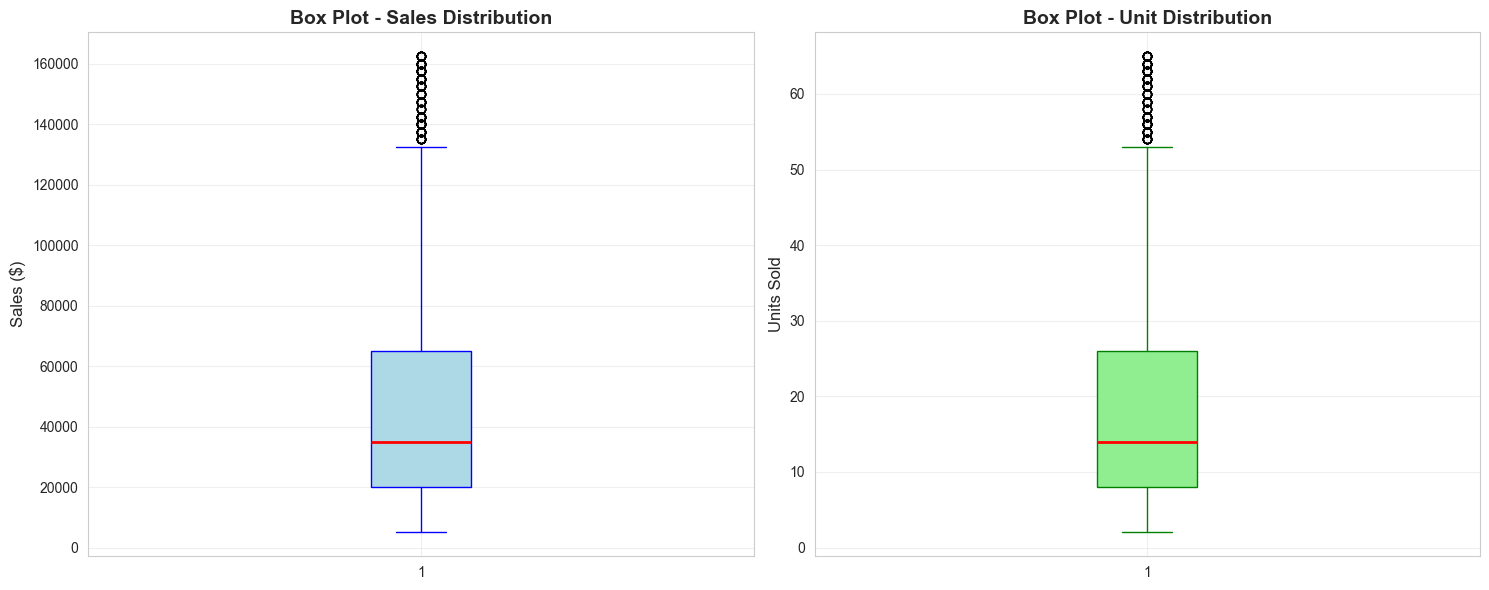

In [23]:
# Create box plots for Sales and Unit
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot for Sales
axes[0].boxplot(df_clean['Sales'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'),
                medianprops=dict(color='red', linewidth=2))
axes[0].set_title('Box Plot - Sales Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Sales ($)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Box plot for Unit
axes[1].boxplot(df_clean['Unit'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='green'),
                whiskerprops=dict(color='green'),
                capprops=dict(color='green'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Box Plot - Unit Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Units Sold', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2.2 Group Performance Analysis
b.Identify the group with the highest sales and the group with the lowest sales based on the data provided.

In [ ]:
# Identify highest and lowest performing groups
print("Performance Analysis by Demographic Group:")
print("="*80)

group_performance = df_clean.groupby('Group').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': ['sum', 'mean']
}).round(2)

group_performance.columns = ['Total Sales', 'Avg Sales', 'Transaction Count', 'Total Units', 'Avg Units']
group_performance = group_performance.sort_values('Total Sales', ascending=False)

print(group_performance)

print("\n" + "="*80)

Performance Analysis by Demographic Group:
         Total Sales  Avg Sales  Transaction Count  Total Units  Avg Units
Group                                                                     
Men         85750000   45370.37               1890        34300      18.15
Women       85442500   45207.67               1890        34177      18.08
Kids        85072500   45011.90               1890        34029      18.00
Seniors     84037500   44464.29               1890        33615      17.79


**KEY FINDINGS:**
✓ Highest Sales Group: Men with $85,750,000.00
✓ Lowest Sales Group: Seniors with $84,037,500.00
✓ Most Active Group (by transactions): Men
✓ Highest Average Transaction: Men


In [ ]:
# State-wise performance analysis
print("Performance Analysis by State:")
print("="*80)

state_performance = df_clean.groupby('State').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': ['sum', 'mean']
}).round(2)

state_performance.columns = ['Total Sales', 'Avg Sales', 'Transaction Count', 'Total Units', 'Avg Units']
state_performance = state_performance.sort_values('Total Sales', ascending=False)

print(state_performance)


Performance Analysis by State:
       Total Sales  Avg Sales  Transaction Count  Total Units  Avg Units
State                                                                   
VIC      105565000   97745.37               1080        42226      39.10
NSW       74970000   69416.67               1080        29988      27.77
SA        58857500   54497.69               1080        23543      21.80
QLD       33417500   30942.13               1080        13367      12.38
TAS       22760000   21074.07               1080         9104       8.43
NT        22580000   20907.41               1080         9032       8.36
WA        22152500   20511.57               1080         8861       8.20


In [ ]:
# c.Identify the group with the highest and lowest sales based on the data provided.
print("DAILY SALES REPORT:")
print("="*80)
daily_report = df_clean.groupby('Date').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': 'sum'
}).round(2)
daily_report.columns = ['Total Sales', 'Avg Sales', 'Transactions', 'Total Units']
print(daily_report.head(15))
print(f"\nTotal days in dataset: {len(daily_report)}")

In [ ]:
# d.Generate weekly, monthly, and quarterly reports to
#  document and present the results of the analysis conducted.
print("WEEKLY SALES REPORT:")
print("="*80)
weekly_report = df_clean.groupby(['Year', 'Week']).agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': 'sum'
}).round(2)
weekly_report.columns = ['Total Sales', 'Avg Sales', 'Transactions', 'Total Units']
print(weekly_report)

print("\n" + "="*80)
print(f"\n**Best Performing Week:** Week {weekly_report['Total Sales'].idxmax()[1]} with ${weekly_report['Total Sales'].max():,.2f}")
print(f"**Weakest Week:** Week {weekly_report['Total Sales'].idxmin()[1]} with ${weekly_report['Total Sales'].min():,.2f}")

In [ ]:
# Monthly Report
print("MONTHLY SALES REPORT:")
print("="*80)
monthly_report = df_clean.groupby('Month_Name').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': 'sum'
}).round(2)
monthly_report.columns = ['Total Sales', 'Avg Sales', 'Transactions', 'Total Units']

# Reorder by month
month_order = ['October', 'November', 'December']
monthly_report = monthly_report.reindex([m for m in month_order if m in monthly_report.index])
print(monthly_report)

print("\n" + "="*80)
print(f"\n**Best Performing Month:** {monthly_report['Total Sales'].idxmax()} with ${monthly_report['Total Sales'].max():,.2f}")
print(f"**Growth/Decline Trend:** ", end="")
if len(monthly_report) >= 2:
    pct_change = ((monthly_report['Total Sales'].iloc[-1] - monthly_report['Total Sales'].iloc[0]) / monthly_report['Total Sales'].iloc[0]) * 100
    print(f"{pct_change:+.2f}% from {monthly_report.index[0]} to {monthly_report.index[-1]}")

In [ ]:
# Quarterly Report (Q4 2020)
print("QUARTERLY SALES REPORT (Q4 2020):")
print("="*80)
quarterly_report = df_clean.groupby('Quarter').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': 'sum'
}).round(2)
quarterly_report.columns = ['Total Sales', 'Avg Sales', 'Transactions', 'Total Units']
print(quarterly_report)


---
# 3. DATA VISUALIZATION

### a.Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key parameters

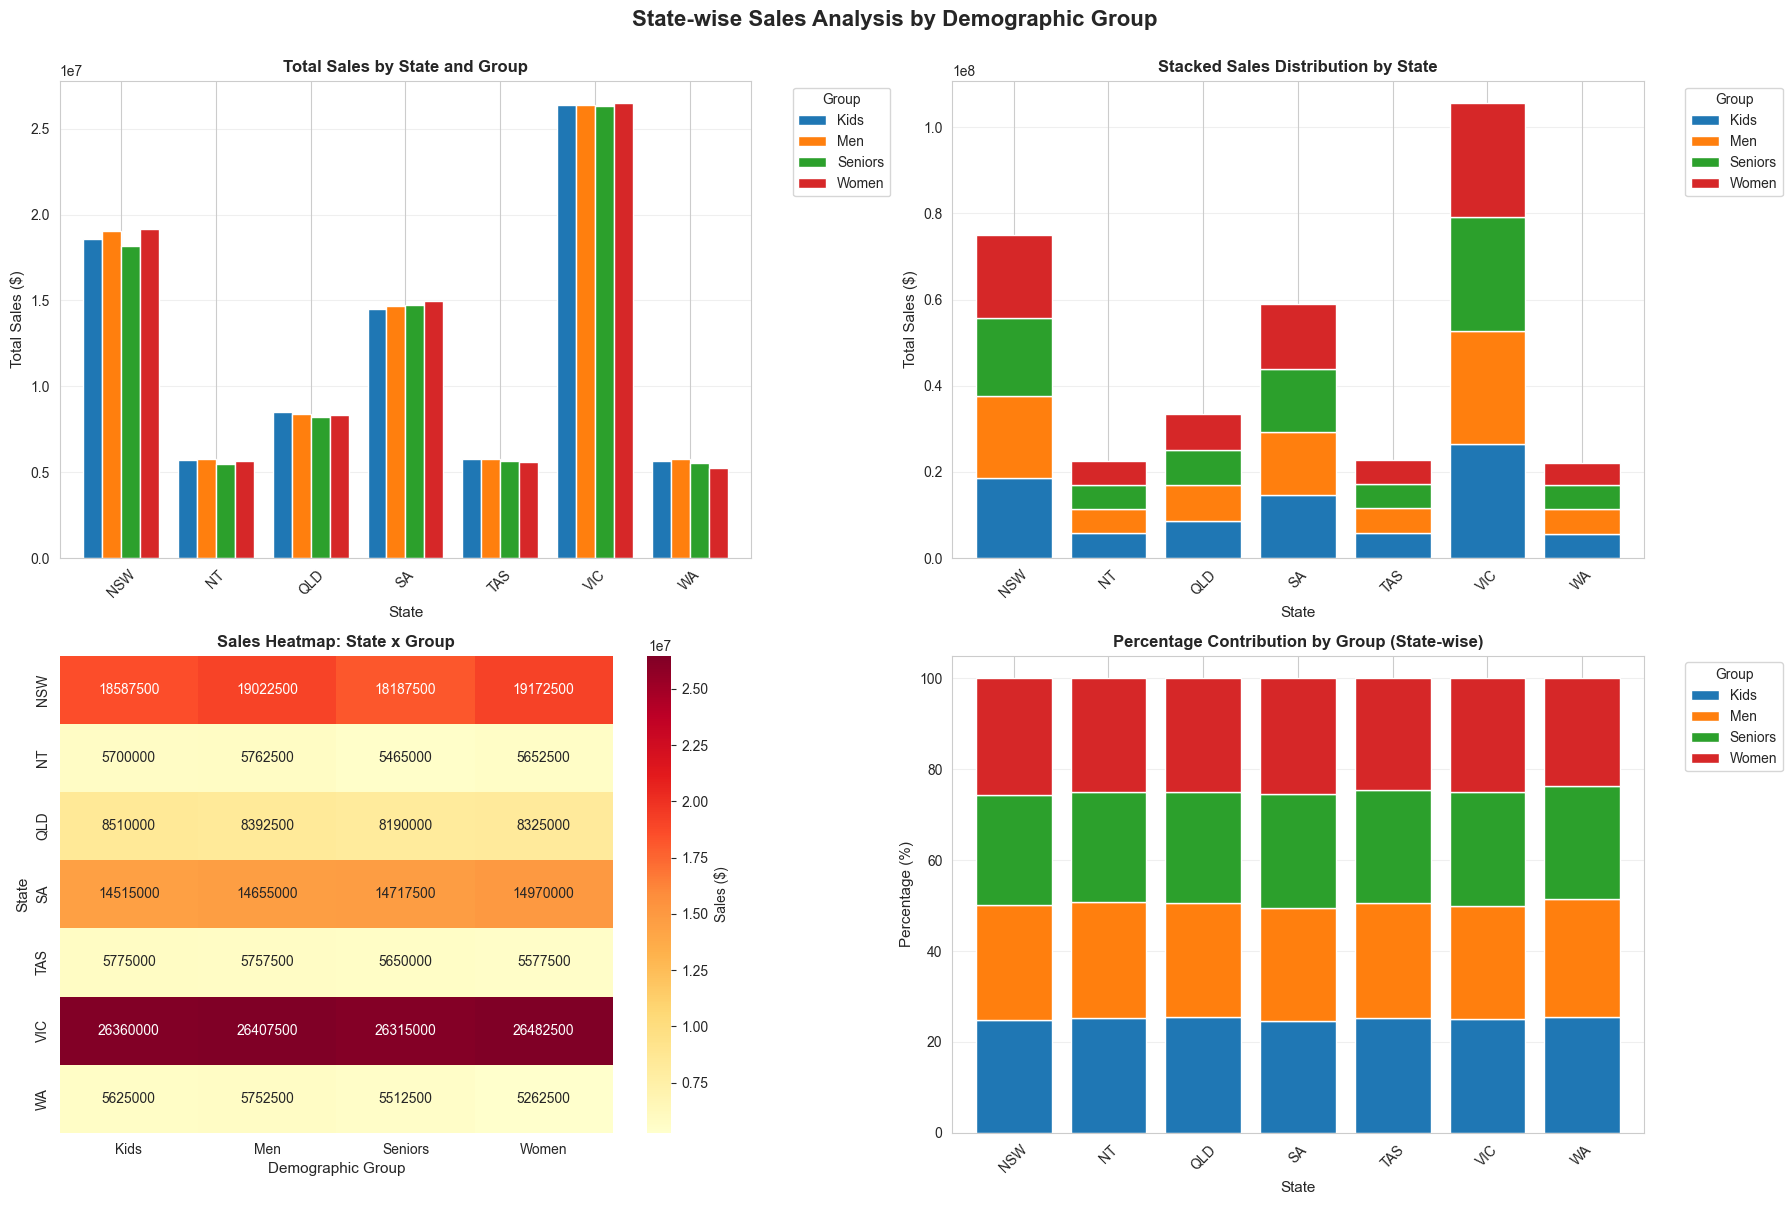

In [27]:
# State-wise sales by demographic group
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('State-wise Sales Analysis by Demographic Group', fontsize=16, fontweight='bold', y=1.00)

# Pivot data for visualization
state_group_pivot = df_clean.pivot_table(values='Sales', index='State', columns='Group', aggfunc='sum')

# 1. Grouped Bar Chart
state_group_pivot.plot(kind='bar', ax=axes[0, 0], rot=45, width=0.8)
axes[0, 0].set_title('Total Sales by State and Group', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('State', fontsize=11)
axes[0, 0].set_ylabel('Total Sales ($)', fontsize=11)
axes[0, 0].legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Stacked Bar Chart
state_group_pivot.plot(kind='bar', stacked=True, ax=axes[0, 1], rot=45, width=0.8)
axes[0, 1].set_title('Stacked Sales Distribution by State', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('State', fontsize=11)
axes[0, 1].set_ylabel('Total Sales ($)', fontsize=11)
axes[0, 1].legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Heatmap
sns.heatmap(state_group_pivot, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1, 0], cbar_kws={'label': 'Sales ($)'})
axes[1, 0].set_title('Sales Heatmap: State x Group', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Demographic Group', fontsize=11)
axes[1, 0].set_ylabel('State', fontsize=11)

# 4. Percentage contribution
state_group_pct = state_group_pivot.div(state_group_pivot.sum(axis=1), axis=0) * 100
state_group_pct.plot(kind='bar', stacked=True, ax=axes[1, 1], rot=45, width=0.8)
axes[1, 1].set_title('Percentage Contribution by Group (State-wise)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('State', fontsize=11)
axes[1, 1].set_ylabel('Percentage (%)', fontsize=11)
axes[1, 1].legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 3.b Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.

In [ ]:
# Group-wise analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Group-wise Sales Analysis Across States', fontsize=16, fontweight='bold', y=1.00)

# Pivot data
group_state_pivot = df_clean.pivot_table(values='Sales', index='Group', columns='State', aggfunc='sum')

# 1. Grouped Bar Chart
group_state_pivot.plot(kind='bar', ax=axes[0, 0], rot=0, width=0.8)
axes[0, 0].set_title('Total Sales by Group Across States', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Demographic Group', fontsize=11)
axes[0, 0].set_ylabel('Total Sales ($)', fontsize=11)
axes[0, 0].legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2-4. Pie charts for each group (or as many as fit)
groups = sorted(df_clean['Group'].unique())
colors_pie = sns.color_palette('Set3', len(df_clean['State'].unique()))

for idx in range(min(3, len(groups))):
    row = (idx + 1) // 2
    col = (idx + 1) % 2
    
    group_data = df_clean[df_clean['Group'] == groups[idx]].groupby('State')['Sales'].sum()
    axes[row, col].pie(group_data.values, labels=group_data.index, autopct='%1.1f%%',
                       startangle=90, colors=colors_pie)
    axes[row, col].set_title(f'{groups[idx]} Sales Distribution by State', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 3.c Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.

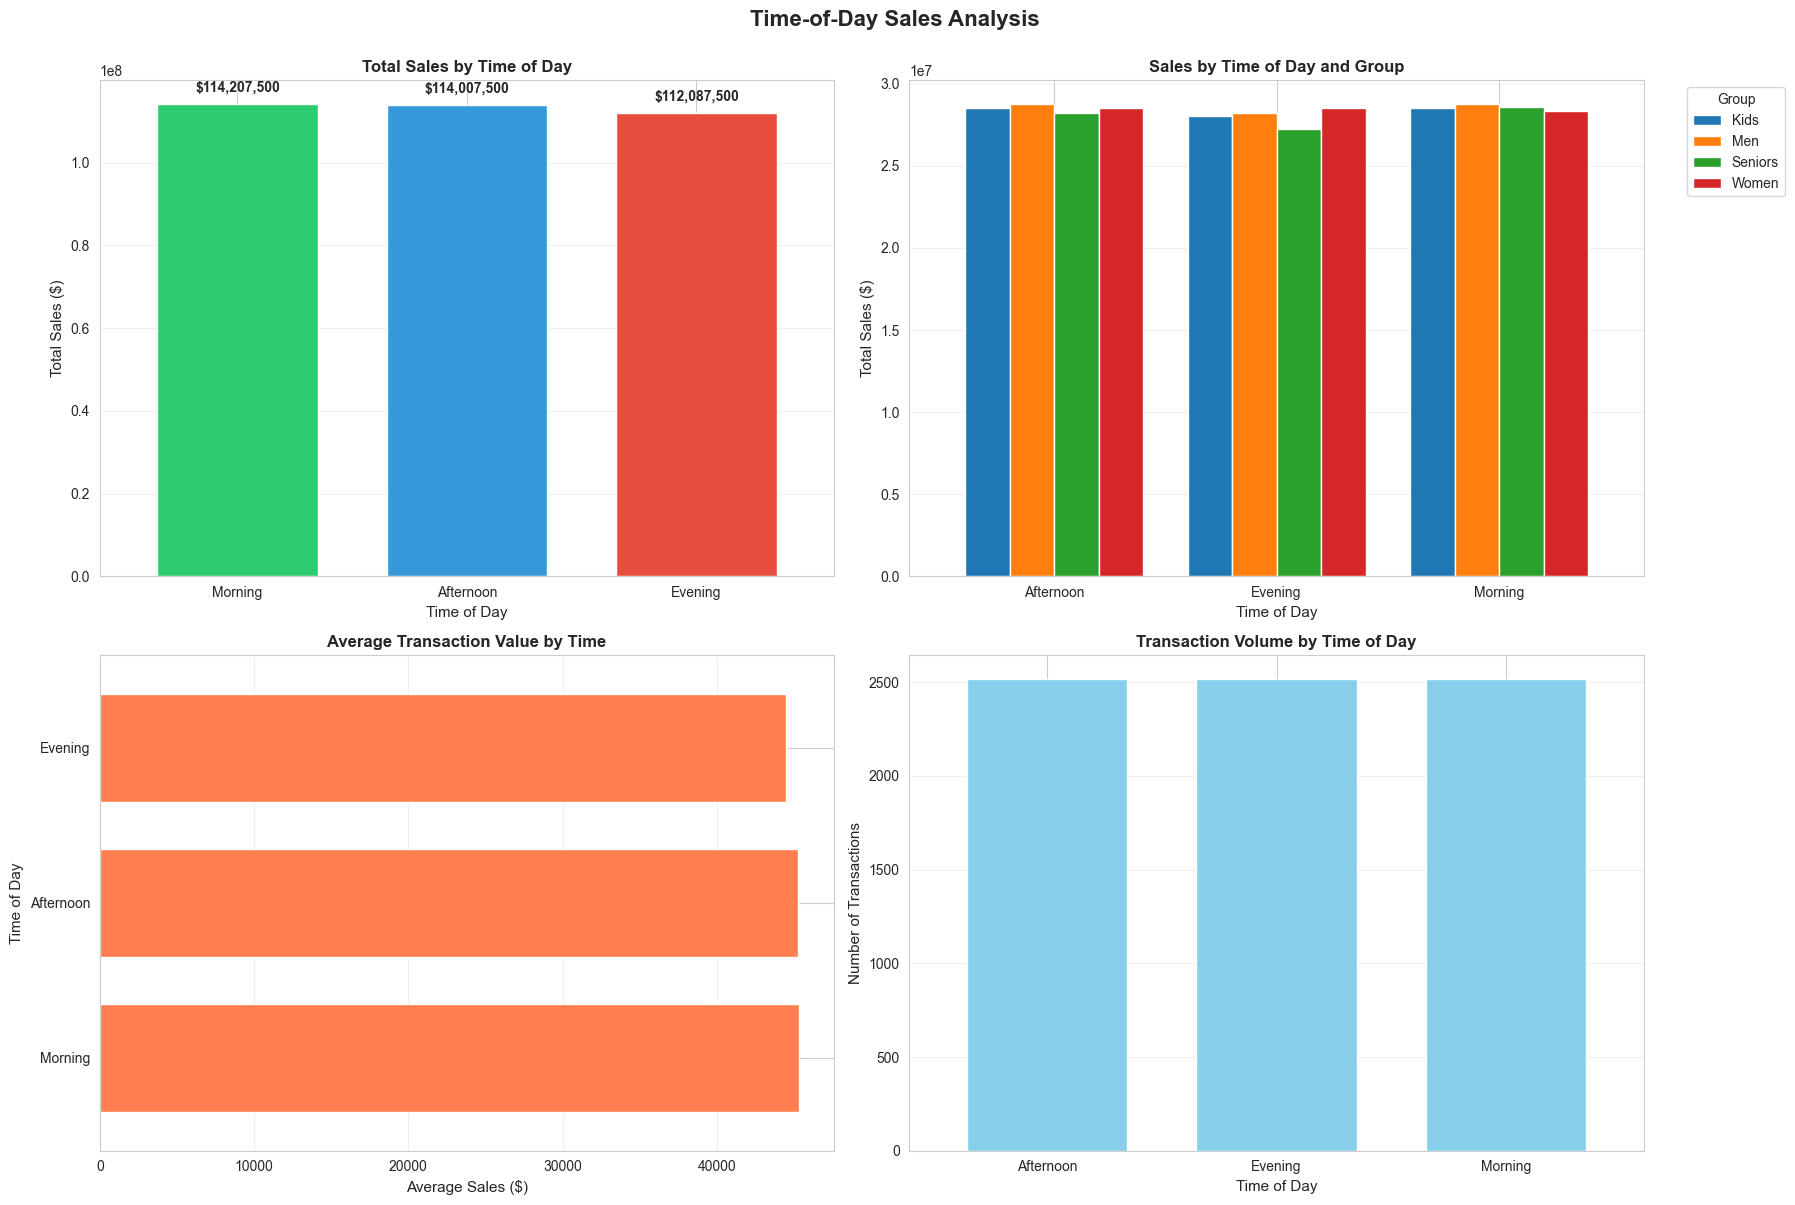


PEAK AND OFF-PEAK ANALYSIS:

✓ PEAK PERIOD: Morning with $114,207,500 in total sales
✓ OFF-PEAK PERIOD: Evening with $112,087,500 in total sales

✓ Peak vs Off-peak difference: $2,120,000
✓ Peak is 1.9% higher than off-peak


In [29]:
# Time-of-day analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Time-of-Day Sales Analysis', fontsize=16, fontweight='bold', y=1.00)

# 1. Overall time-of-day sales
time_sales = df_clean.groupby('Time')['Sales'].sum().sort_values(ascending=False)
colors_time = ['#2ecc71' if val == time_sales.max() else '#e74c3c' if val == time_sales.min() else '#3498db' for val in time_sales.values]

time_sales.plot(kind='bar', ax=axes[0, 0], color=colors_time, width=0.7)
axes[0, 0].set_title('Total Sales by Time of Day', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Time of Day', fontsize=11)
axes[0, 0].set_ylabel('Total Sales ($)', fontsize=11)
axes[0, 0].set_xticklabels(time_sales.index, rotation=0)
axes[0, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(time_sales.values):
    axes[0, 0].text(i, v + time_sales.max() * 0.02, f'${v:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 2. Time-of-day by group
time_group_pivot = df_clean.pivot_table(values='Sales', index='Time', columns='Group', aggfunc='sum')
time_group_pivot.plot(kind='bar', ax=axes[0, 1], rot=0, width=0.8)
axes[0, 1].set_title('Sales by Time of Day and Group', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Time of Day', fontsize=11)
axes[0, 1].set_ylabel('Total Sales ($)', fontsize=11)
axes[0, 1].legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Average transaction value by time
time_avg = df_clean.groupby('Time')['Sales'].mean().sort_values(ascending=False)
time_avg.plot(kind='barh', ax=axes[1, 0], color='coral', width=0.7)
axes[1, 0].set_title('Average Transaction Value by Time', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Average Sales ($)', fontsize=11)
axes[1, 0].set_ylabel('Time of Day', fontsize=11)
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Transaction count by time
time_count = df_clean.groupby('Time').size().sort_values(ascending=False)
time_count.plot(kind='bar', ax=axes[1, 1], color='skyblue', width=0.7)
axes[1, 1].set_title('Transaction Volume by Time of Day', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Time of Day', fontsize=11)
axes[1, 1].set_ylabel('Number of Transactions', fontsize=11)
axes[1, 1].set_xticklabels(time_count.index, rotation=0)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Peak and Off-peak identification
print("\n" + "="*80)
print("PEAK AND OFF-PEAK ANALYSIS:")
print("="*80)
print(f"\n✓ PEAK PERIOD: {time_sales.idxmax()} with ${time_sales.max():,.0f} in total sales")
print(f"✓ OFF-PEAK PERIOD: {time_sales.idxmin()} with ${time_sales.min():,.0f} in total sales")
print(f"\n✓ Peak vs Off-peak difference: ${time_sales.max() - time_sales.min():,.0f}")
print(f"✓ Peak is {(time_sales.max() / time_sales.min() - 1) * 100:.1f}% higher than off-peak")


## 3.4 Daily Sales Trends
b.	Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M).
The dashboard must contain daily, weekly, monthly, and quarterly charts.


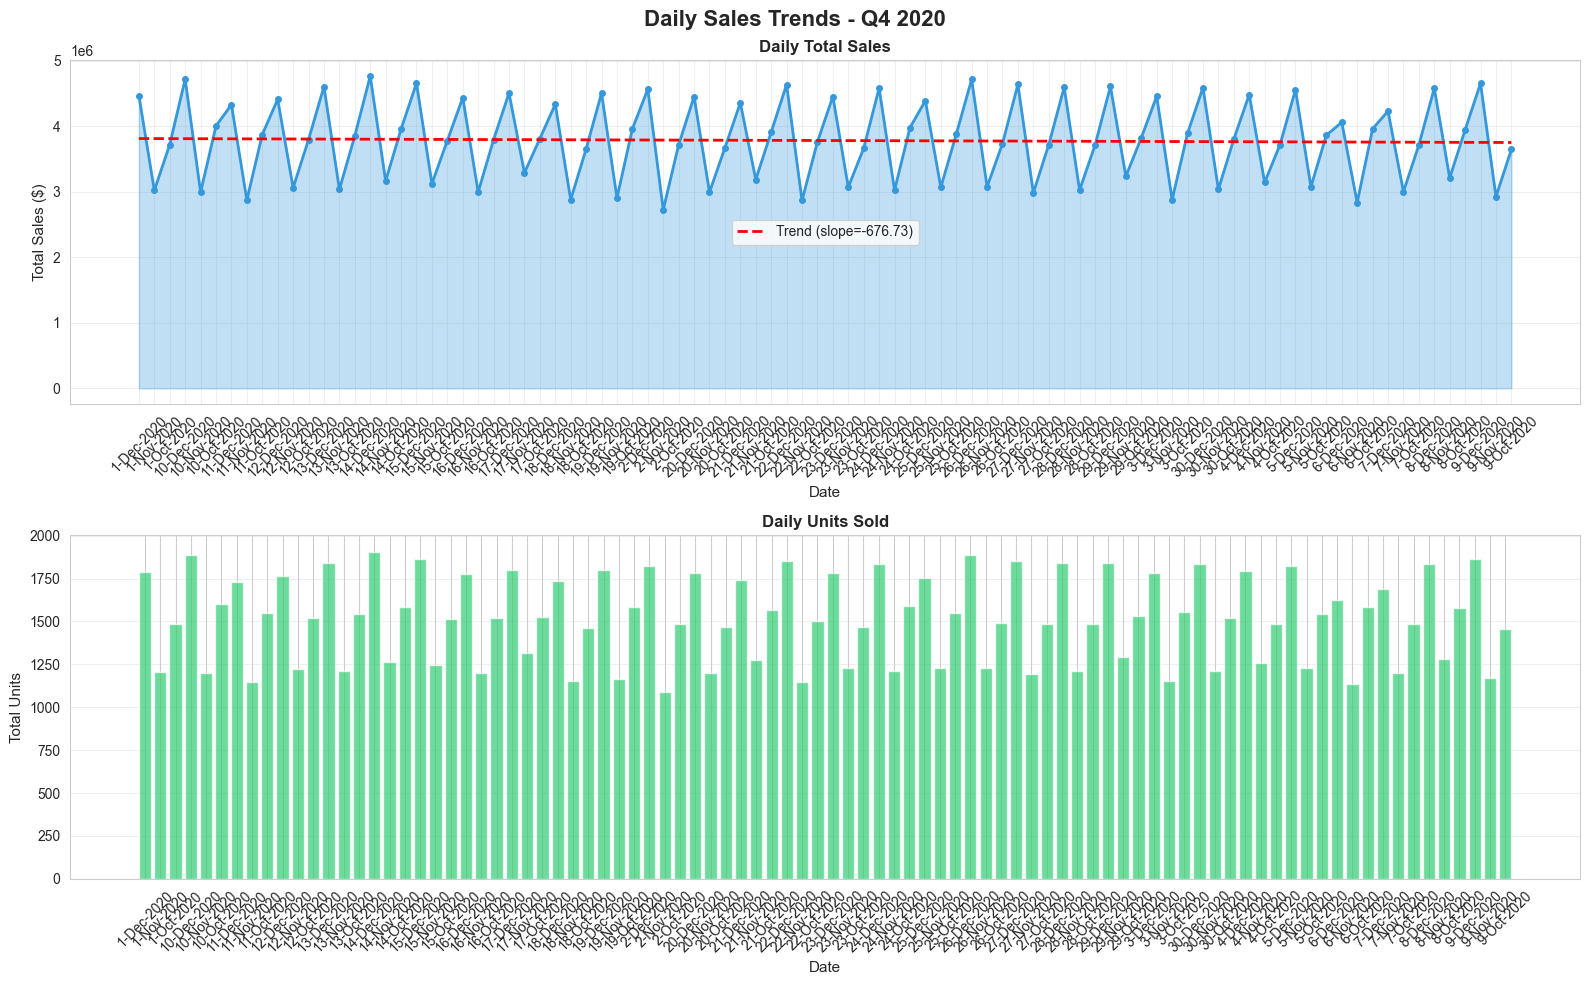

In [30]:
# Daily trends
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Daily Sales Trends - Q4 2020', fontsize=16, fontweight='bold')

# 1. Line chart - daily sales
daily_sales = df_clean.groupby('Date')['Sales'].sum()
axes[0].plot(daily_sales.index, daily_sales.values, marker='o', linewidth=2, markersize=4, color='#3498db')
axes[0].fill_between(daily_sales.index, daily_sales.values, alpha=0.3, color='#3498db')
axes[0].set_title('Daily Total Sales', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=11)
axes[0].set_ylabel('Total Sales ($)', fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Add trend line
z = np.polyfit(range(len(daily_sales)), daily_sales.values, 1)
p = np.poly1d(z)
axes[0].plot(daily_sales.index, p(range(len(daily_sales))), "r--", linewidth=2, label=f'Trend (slope={z[0]:.2f})')
axes[0].legend()

# 2. Bar chart - daily units sold
daily_units = df_clean.groupby('Date')['Unit'].sum()
axes[1].bar(daily_units.index, daily_units.values, color='#2ecc71', alpha=0.7, width=0.8)
axes[1].set_title('Daily Units Sold', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=11)
axes[1].set_ylabel('Total Units', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3.7 Seaborn Distribution Plots for Statistical Analysis

/var/folders/ry/hmwdqb7950b9qsykrtzp91zm0000gr/T/ipykernel_66118/1451748013.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='Group', y='Sales', ax=axes[1, 0], palette='Set2')
/var/folders/ry/hmwdqb7950b9qsykrtzp91zm0000gr/T/ipykernel_66118/1451748013.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='Time', y='Sales', ax=axes[1, 1], palette='Set3')


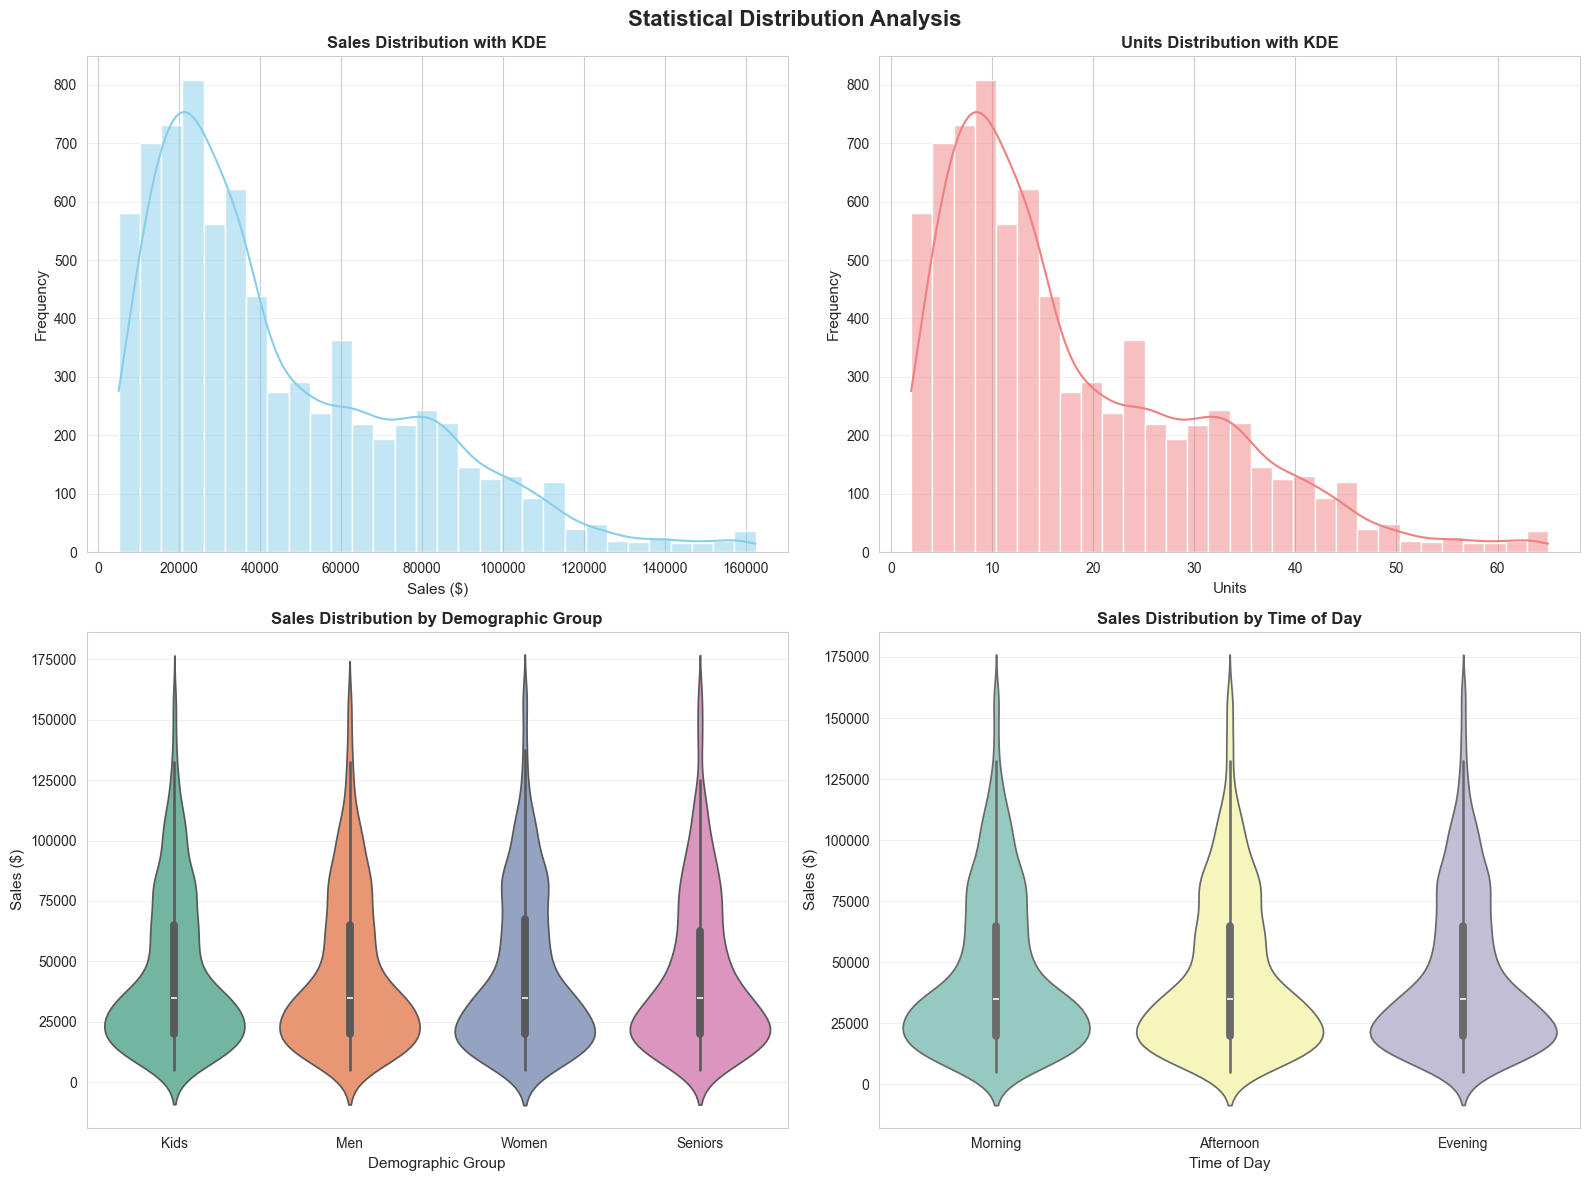

In [33]:
# Seaborn distribution plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Statistical Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Distribution plot for Sales
sns.histplot(data=df_clean, x='Sales', kde=True, ax=axes[0, 0], color='skyblue', bins=30)
axes[0, 0].set_title('Sales Distribution with KDE', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Sales ($)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Distribution plot for Units
sns.histplot(data=df_clean, x='Unit', kde=True, ax=axes[0, 1], color='lightcoral', bins=30)
axes[0, 1].set_title('Units Distribution with KDE', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Units', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Violin plot - Sales by Group
sns.violinplot(data=df_clean, x='Group', y='Sales', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Sales Distribution by Demographic Group', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Demographic Group', fontsize=11)
axes[1, 0].set_ylabel('Sales ($)', fontsize=11)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Violin plot - Sales by Time
sns.violinplot(data=df_clean, x='Time', y='Sales', ax=axes[1, 1], palette='Set3')
axes[1, 1].set_title('Sales Distribution by Time of Day', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Time of Day', fontsize=11)
axes[1, 1].set_ylabel('Sales ($)', fontsize=11)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## 4. REPORT GENERATION AND KEY FINDINGS

a)	Use JupyterLab Notebook for generating reports, which includes tasks such as data wrangling, analysis, and visualization. Please note that JupyterLab enables you to integrate code seamlessly with graphs and plots.

In [37]:
# Generate comprehensive executive summary
print("="*100)
print(" " * 35 + "EXECUTIVE SUMMARY")
print(" " * 30 + "Q4 2020 - SALES PERFORMANCE REPORT")
print("="*100)

total_revenue = df_clean['Sales'].sum()
total_units = df_clean['Unit'].sum()
total_transactions = len(df_clean)
avg_transaction = total_revenue / total_transactions
num_states = df_clean['State'].nunique()
num_groups = df_clean['Group'].nunique()

print(f"\n📊 **OVERALL PERFORMANCE METRICS:**")
print(f"   • Total Revenue: ${total_revenue:,.2f}")
print(f"   • Total Units Sold: {total_units:,.0f} units")
print(f"   • Total Transactions: {total_transactions:,.0f}")
print(f"   • Average Transaction Value: ${avg_transaction:,.2f}")
print(f"   • Coverage: {num_states} States, {num_groups} Demographic Groups")

print(f"\n🏆 **TOP PERFORMERS:**")
# Best State
best_state = df_clean.groupby('State')['Sales'].sum().idxmax()
best_state_sales = df_clean.groupby('State')['Sales'].sum().max()
print(f"   • Best Performing State: {best_state} (${best_state_sales:,.2f})")

# Best Group
best_group = df_clean.groupby('Group')['Sales'].sum().idxmax()
best_group_sales = df_clean.groupby('Group')['Sales'].sum().max()
print(f"   • Best Performing Group: {best_group} (${best_group_sales:,.2f})")

# Best Time
best_time = df_clean.groupby('Time')['Sales'].sum().idxmax()
best_time_sales = df_clean.groupby('Time')['Sales'].sum().max()
print(f"   • Peak Sales Period: {best_time} (${best_time_sales:,.2f})")

print(f"\n⚠️ **AREAS FOR IMPROVEMENT:**")
# Worst performers
worst_state = df_clean.groupby('State')['Sales'].sum().idxmin()
worst_state_sales = df_clean.groupby('State')['Sales'].sum().min()
print(f"   • Underperforming State: {worst_state} (${worst_state_sales:,.2f})")

worst_group = df_clean.groupby('Group')['Sales'].sum().idxmin()
worst_group_sales = df_clean.groupby('Group')['Sales'].sum().min()
print(f"   • Underperforming Group: {worst_group} (${worst_group_sales:,.2f})")

worst_time = df_clean.groupby('Time')['Sales'].sum().idxmin()
worst_time_sales = df_clean.groupby('Time')['Sales'].sum().min()
print(f"   • Off-Peak Period: {worst_time} (${worst_time_sales:,.2f})")

print("\n" + "="*100)

                                   EXECUTIVE SUMMARY
                              Q4 2020 - SALES PERFORMANCE REPORT

📊 **OVERALL PERFORMANCE METRICS:**
   • Total Revenue: $340,302,500.00
   • Total Units Sold: 136,121 units
   • Total Transactions: 7,560
   • Average Transaction Value: $45,013.56
   • Coverage: 7 States, 4 Demographic Groups

🏆 **TOP PERFORMERS:**
   • Best Performing State: VIC ($105,565,000.00)
   • Best Performing Group: Men ($85,750,000.00)
   • Peak Sales Period: Morning ($114,207,500.00)

⚠️ **AREAS FOR IMPROVEMENT:**
   • Underperforming State: WA ($22,152,500.00)
   • Underperforming Group: Seniors ($84,037,500.00)
   • Off-Peak Period: Evening ($112,087,500.00)

